# Matrix Analysis 2022 - EE312

## Week 6 - Discrete Poisson equation 
[LTS2](https://lts2.epfl.ch)

## Important
You need to submit *individually* your answers on moodle before the next exercise session (i.e. Monday or Friday depending if you are BA4/BA6). Answers to theoretical questions can be either written in the notebook or submitted separately.

### Objectives
Apply your knowledge about linear systems to Poisson equation resolution.

## Poisson equation
Let $u,v \in \mathbb{R}^n$  represent a physical quantity $f$ and $g: \mathbb{R} \mapsto \mathbb{R}$ sampled at $n$ equi-spaced locations $x_i$, i.e $u_i = f(x_i)$, $v_i = g(x_i)$. 
Let us assume that the underlying continuous object satisfies the Poisson equation: $\frac{d^2}{dx^2} f (x)= g(x)$ with constraints $f(x_j) = y_j$ for a subset of $m$ locations $j \in \{i_1, \ldots i_m \}$. We will assume that all the $i_k$ are distincts.

This equation governs a number of physical principles, e.g. gravity, fluid mechanics and electrostatics. In the latter we have $\Delta \varphi = -\frac{\rho}{\varepsilon}$, where $\Delta$ is the Laplacian operator $(\frac{d^2}{dx^2} + \frac{d^2}{dy^2} + \frac{d^2}{dz^2})$, $\varphi$ is the electric potential, $\rho$ the density of electric charges and $\varepsilon$ the electric permittivity.

---

#### For the sake of simplicity, we will only consider the 1D case.


1. Write down a matrix equation for the discrete version of $\frac{d^2}{dx^2} f (x)= g(x)$, using the finite-difference approximation of the derivative $\frac{d^2}{dx^2} f  = f(x_{k+1}) - 2f(x_k) +f(x_{k-1})$. For the boundary conditions we will make the assumption that $x_{-1}=x_0$ and $x_{n-1}=x_n$ (also referred to as Dirichlet boundary conditions)

What is the rank of the corresponding matrix $D$ ? 

$D = \left[ 
    {\begin{array}{ccccc} 
        -1 & 1 & \ldots & & 0\\
        1 & -2 & 1 & \ldots & 0 \\
        \vdots & &  \ddots & & \vdots\\
        0 & \ldots & 1 & -2 & 1\\
        0 & &\ldots  & 1 & -1\\
    \end{array}
}\right] 
\sim \left[ 
    {\begin{array}{ccccc} 
        -1 & 1 & \ldots & & 0\\
        0 & -1 & 1 & \ldots & 0 \\
        \vdots & &  \ddots & & \vdots\\
        0 & \ldots & 0 & -1 & 1\\
        0 & &\ldots  & 1 & -1\\
    \end{array}
}\right]
\Rightarrow \text{rank}(D) = n-1
$

<Your answers here>

Implement a function that creates the $D$ matrix (also called Laplacian). You should check the [diag](https://numpy.org/doc/stable/reference/generated/numpy.diag.html) function in numpy.

In [70]:
import numpy as np
import matplotlib.pyplot as plt

def lapl_matrix(N):
    return np.zeros((N,N),dtype=np.float64) + np.diag(
        [-1 if i == 0 or i == N-1 else -2 for i in range(N)]
    ) + np.diag(np.ones(N-1), 1) + np.diag(np.ones(N-1), -1)

D=lapl_matrix(5)

2. Write down a matrix equation for the discrete version of $f(x_j) = y_j$. What is the rank of the corresponding matrix $B$ ?

<Your answers here>

Implement a function that creates matrix $B$

In [42]:
def b_matrix(N, idx_list): # idx_list is a list of valid indices, e.g. N=5, idx_list=[1,3]
    return np.identity(N)[idx_list]

B= b_matrix(5,[1,3])
B

array([[0., 1., 0., 0., 0.],
       [0., 0., 0., 1., 0.]])

3. Write down a matrix equation for the full problem (Hint: Consider the matrix $C=\begin{pmatrix}D\\B\end{pmatrix}$). Discuss the rank of the matrix and deduce a way to numerically solve the linear system. 

Find best fitting solution for
$D\vec x = \vec v \text{ and } B\vec x =  \vec{u}\prime \Leftrightarrow
C \vec x = 
\left[{\begin{array}{c}
    \vec{v}\\
    \vec{u}\prime\\
\end{array}}\right]$

with $\vec{v} = g(\vec x)$ and 
$\vec{u}\prime = \left({\begin{array}{c}
y_{i_1}\\
y_{i_2}\\
\vdots\\
y_{i_m}\\
\end{array}}\right)$
m points given


$C = \left[\begin{array}{c}
    D\\
    B
\end{array}
\right]
= \left[ 
    {\begin{array}{ccccc} 
        -1 & 1 & \ldots & & 0\\
        1 & -2 & 1 & \ldots & 0 \\
        \vdots & &  \ddots & & \vdots\\
        0 & \ldots & 1 & -2 & 1\\
        0 & &\ldots  & 1 & -1\\
        \ldots & 1 & \ldots & 0 & \ldots\\
        \ldots & 0 & \ldots & 1 & \ldots\\
    \end{array}
}\right] 
\sim \left[ 
    {\begin{array}{ccccc} 
        -1 & 1 & \ldots & & 0\\
        0 & -1 & 1 & \ldots & 0 \\
        \vdots & &  \ddots & & \vdots\\
        0 & \ldots & 0 & -1 & 1\\
        0 & &\ldots  & 1 & -1\\
        \ldots & 1 & \ldots & 0 & \ldots\\
        \ldots & 0 & \ldots & 1 & \ldots\\
    \end{array}
}\right]$


$\sim \left[ 
    {\begin{array}{ccccc} 
        -1 & 0 & \ldots & & 1\\
        0 & -1 & 0 & \ldots & 1 \\
        \vdots & &  \ddots & & \vdots\\
        0 & \ldots & 0 & -1 & 1\\
        0 & &\ldots  & 0 & 0\\
        \ldots & 1 & \ldots & 0 & \ldots\\
        \ldots & 0 & \ldots & 1 & \ldots\\
    \end{array}
}\right]
\sim \left[ 
    {\begin{array}{ccccc} 
        1 & 0 & \ldots & & 0\\
        0 & \color{orange}{0} & 0 & \ldots & \color{orange}{1} \\
        \vdots & &  \ddots & & \vdots\\
        0 & \ldots & 0 & 1 & 0\\
        0 & &\ldots  & 0 & 0\\
        \ldots & \color{orange}{1} & \ldots & 0 & \ldots\\
        \ldots & 0 & \ldots & 1 & \ldots\\
    \end{array}
}\right]$

$
\text{if } \text{rank}(B) \geq 1 \Rightarrow \text{rank}(C) = n
\Rightarrow C \text{ is 1-to-1}
$



Implement a function that creates matrix $C$

In [43]:
def c_matrix(lapl, b_mat):
    return np.array([*lapl, *b_mat])

c_matrix(lapl=D,b_mat=B)

array([[-1.,  1.,  0.,  0.,  0.],
       [ 1., -2.,  1.,  0.,  0.],
       [ 0.,  1., -2.,  1.,  0.],
       [ 0.,  0.,  1., -2.,  1.],
       [ 0.,  0.,  0.,  1., -1.],
       [ 0.,  1.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  1.,  0.]])

What explicit formula can you use to compute the pseudo-inverse of $C$ (justify)?

As $C$ is 1-to-1 $\Rightarrow C^+ = (C^T C)^{-1}C^{-1}$

Implement a function that return the solution of the problem. You can either use the formula above (you may then use the [linalg.inv](https://numpy.org/doc/stable/reference/generated/numpy.linalg.inv.html) or compute the pseudo-inverse using [linalg.pinv](https://numpy.org/doc/stable/reference/generated/numpy.linalg.pinv.html).

In [57]:
# v is a vector of size N
# u is a vector of size len(idx_list)
def solve_poisson(N, v, idx_list, u): 
    c = c_matrix(lapl_matrix(N), b_matrix(N, idx_list))
    c_plus = np.linalg.pinv(c)
    y = np.concatenate([v, u], axis=0)
    return c_plus@y

4. Let us now consider the solutions of the particular case $g(x) = 0, \forall x\in\mathbb{R}$. What are the analytical solutions that would solve Poisson equation ?

The solutions are $\int \left( \int 0 dx \right) dx$ = c_1 x + c_2

We don't consider Dirichlet for now $f\prime(x_0) = f\prime(x_1) = 0 \text{ as } f(x) = c_1 \Rightarrow c_1 = 0$ 

<Your answer here>

Let us verify that our implementation of the solution works with a small example

In [58]:
N = 50
v = np.zeros(N)
idx_list = [10, 20, 30, 40]
u = idx_list #[100, 100, 100, 100] # [1,1,1,1] # use values from a function the solution space
sol = solve_poisson(N, v, idx_list, u)

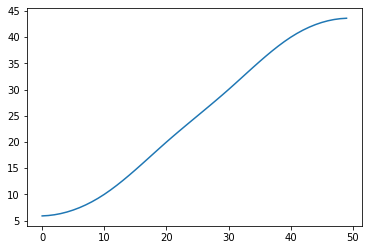

In [60]:
plt.plot(sol) # plot the result

Are the results conform to what we expected ? What happens near the boundaries ?

Yes, but the Dirichlet condition flatten the boundaries.

Let us use a step function for $f$ and try to solve the system

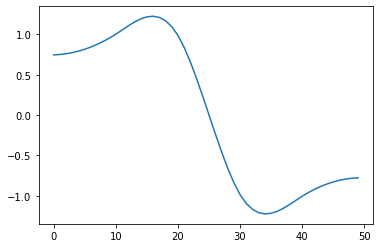

In [99]:
idx_list = [10, 20, 30, 40]
u2 = [1, 1, -1, -1]
sol2 = solve_poisson(N, v, idx_list, u2)
plt.plot(sol2)


MSE 0.0003156889219687547


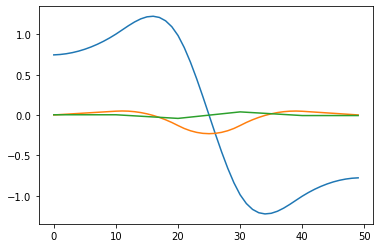

In [98]:
#
# Have a look at the result
#

def derivative(N):
    return (np.zeros((N,N),dtype=np.float64) + np.diag(
        [-1 if i == 0 else 1 if i == N-1 else 0 for i in range(N)]
    ) + np.diag(np.ones(N-1), 1) - np.diag(np.ones(N-1), -1))/2

plt.plot(sol2)
plt.plot(derivative(N)@sol2) # derivative 
plt.plot(lapl_matrix(N)@sol2) # laplacian

print("MSE", np.square(np.subtract(lapl_matrix(N)@sol2, v)).mean())


What do you observe and what is the reason for that ? 


It is not a step function, because the step function doesn't fit the poisson equation with $g(x)=0$. The error is incredibly small. 

<Your answer here>

5. Let us now consider the application of the Poisson equation to electrostatic. Knowing a distribution of electric charges, we can solve it to compute the electric potential. The distribution of electric charges will be very simple, consisting of two punctual charges

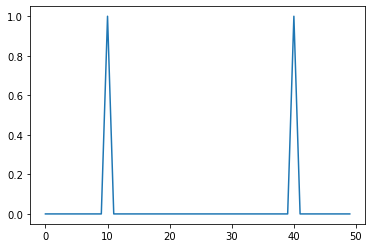

In [93]:
N = 50
v3 = np.zeros(N)
v3[10] = 1
v3[40] = 1
plt.plot(v3)

What are the analytical solutions for this problem ? (remember the discrete derivative of a step function is a Dirac function, i.e. 0 everywhere except at one point where it is 1). 

Linear segements between 0,10,40 and 50. Where the slope is increased by 1 at 10 and 40, only
$
f(x) = \begin{cases}
(c-1)x + a \\
cx + a  \\
(c+1)x + a 
\end{cases}
$

With $f(10)=1$ and $f(40)=1$

$
f(x) = \begin{cases}
-x + 11 \\
1\\
x - 39 
\end{cases}
$  

<Your answer here>

Compute the numerical solution

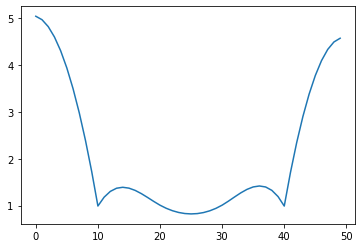

In [94]:
idx_list = [10, 20, 30, 40]
u3 = [1, 1, 1, 1]
sol3 = solve_poisson(N, v3, idx_list, u3)
plt.plot(sol3)

MSE 0.0030623574095248974


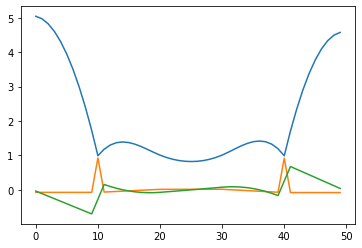

In [97]:
#
# Have a look at the result :
#

plt.plot(sol3)
plt.plot(lapl_matrix(N)@sol3) # laplacian 
plt.plot(derivative(N)@sol3) # derivative

print("MSE", np.square(np.subtract(lapl_matrix(N)@sol3, v3)).mean())

What do you observe ? 

The derivative is optimized to fit Dirichlet but has approximately the expected form.

<Your answer here>